# FakeNews Data Exploration and Analysis
Explor the data to find any interesting insight appearing in the data

In [2]:
from myfunctions import *

## Helper Function

In [67]:
def count_word(s):
    ss = s.split()
    return len(ss)

def remove_symbol(s):
    for sym in discard_symbol:
        s = s.replace(sym, '')
    return s
    
def split_dataframe(data, test_size=0.2, validate_size=0.2, seed=1509):
    X = np.asarray(data['headline'].tolist())
    y = np.asarray(data['is_sarcastic'].tolist())
    
    splitter=StratifiedShuffleSplit(n_splits=1,random_state=seed, test_size=0.2)
    for train_idx, test_idx in splitter.split(X,y):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_test = X[test_idx]
        y_test = y[test_idx]
    
    validate_size = validate_size / (1 - test_size)

    splitter=StratifiedShuffleSplit(n_splits=1,random_state=seed-2, test_size=validate_size)
    for train_idx, validate_idx in splitter.split(X_train,y_train):
        X_validate = X_train[validate_idx]
        y_validate = y_train[validate_idx]
        X_train = X_train[train_idx]
        y_train = y_train[train_idx]
        
    dt = {'is_sarcastic': list(y_train),
          'headline': list(X_train)}
    df_train = pd.DataFrame(dt, columns = ['is_sarcastic', 'headline'])

    dt = {'is_sarcastic': list(y_validate),
          'headline': list(X_validate)}
    df_validate = pd.DataFrame(dt, columns = ['is_sarcastic', 'headline'])

    dt = {'is_sarcastic': list(y_test),
          'headline': list(X_test)}
    df_test = pd.DataFrame(dt, columns = ['is_sarcastic', 'headline'])
    
    return df_train, df_validate, df_test

def lemmatize_word(w, pos='v'):
    w_list = w.split()
    result = [lemmatizer.lemmatize(x, pos=pos) for x in w_list]
    result = ' '.join(result)
    return result

def remove_stop_words(sent):
    list_words = sent.split()
    list_avai = [x for x in list_words if x not in list_stopwords]
    return ' '.join(list_avai)

def count_lemmatized_word(df, col1='headline', col2='lemmatized'):
    list_headline = list(df[col1])
    list_lemmatized = list(df[col2])
    result = []
    for head, lem in zip(list_headline, list_lemmatized):
        head_s = head.split()
        lem_s = lem.split()
        count = 0
        for h, l in zip(head_s, lem_s):
            if h != l:
                count += 1
        result.append(count)
    return result

def count_capitalized(sent):
    list_word = sent.split()
    count = 0
    for word in list_word:
        if word.isupper():
            count += 1
    return count

def min_len_word(sent):
    list_word = sent.split()
    min_len = 9999
    for word in list_word:
        lenw = len(word)
        if lenw < min_len:
            min_len = lenw
    return min_len

def max_len_word(sent):
    list_word = sent.split()
    max_len = -1
    for word in list_word:
        lenw = len(word)
        if lenw > max_len:
            max_len = lenw
    return max_len

def avg_len_word(sent):
    list_word = sent.split()
    sum_len = 0
    for word in list_word:
        lenw = len(word)
        sum_len += lenw
    sum_len /= len(list_word)
    return sum_len

def has_Number(inputString):
    return bool(re.search(r'\d', inputString))

def count_syllable(sent):
    # Count number of syllable of entire sentence
    return textstat.syllable_count(sent)

def min_syl_word(sent):
    list_word = sent.split()
    min_syl = 9999
    for word in list_word:
        sylw = textstat.syllable_count(word)
        if sylw < min_syl:
            min_syl = sylw
    return min_syl

def max_syl_word(sent):
    list_word = sent.split()
    max_len = -1
    for word in list_word:
        lenw = textstat.syllable_count(word)
        if lenw > max_len:
            max_len = lenw
    return max_len

def avg_syl_word(sent):
    list_word = sent.split()
    sum_len = 0
    for word in list_word:
        lenw = textstat.syllable_count(word)
        sum_len += lenw
    sum_len /= len(list_word)
    return sum_len

def count_lexicon(sent):
    # Count number of syllable of entire sentence
    return textstat.lexicon_count(sent, removepunct=True)

## POS Function

In [122]:
def count_noun(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if 'NN' in pos:
            count += 1
    return count

def count_verb_past(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['VBD', 'VBN']:
            count += 1
    return count

def count_verb_present(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['VBZ', 'VBP', 'VB']:
            count += 1
    return count

def count_verb_ing(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['VBG']:
            count += 1
    return count

def count_adj(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['JJ', 'JJR', 'JJS', 'IN']:
            count += 1
    return count

def count_adv(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['RB', 'RBR', 'RBS']:
            count += 1
    return count

def count_DT(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['DT']:
            count += 1
    return count

def count_CD(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['CD']:
            count += 1
    return count

def count_pronoun(sent):
    text = word_tokenize(sent)
    tag = nltk.pos_tag(text)
    count = 0
    for word, pos in tag:
        if pos in ['PRP', 'PRP$']:
            count += 1
    return count

def get_depth_syntax_tree(sent):
    tagged = pos_tag(word_tokenize(sent))
    tree = chunker.parse(tagged) 
    tree_sent = f"{tree}"
    t = nltk.Tree.fromstring(tree_sent)
    depth = t.height()
    return depth

## Traning Model Function

In [3]:
def extract_feature_basic(data_input):
    '''
    Input: data is the dataframe with only is_sarcastic and headline column
    Output: data with full features (except headline column)
    '''
    data = data_input.copy()
    data['len_headline'] = data.headline.apply(lambda row: count_word(row)) # count words in title
    data['headline_s1'] = data.headline.apply(lambda row: remove_symbol(row))
    data['len_headline_s1'] = data.headline_s1.apply(lambda row: count_word(row))
    data['count_symbol'] = data.len_headline - data.len_headline_s1
    data['contain_symbol'] = data.count_symbol.apply(lambda row: 1 if row > 0 else 0)
    data['ratio_symbol'] = 1 - data.len_headline_s1/data.len_headline
    data['headline_s2'] = data.headline_s1.apply(lambda row: lemmatize_word(row, 'v'))
    data['headline_s2'] = data.headline_s2.apply(lambda row: lemmatize_word(row, 'n'))
    data['len_headline_s2'] = data.headline_s2.apply(lambda row: count_word(row))
    data['count_lemmatized'] = count_lemmatized_word(data, 'headline_s1', 'headline_s2')
    data['ratio_lemmatized'] = data['count_lemmatized'] / data['len_headline_s1']
    data['headline_s3'] = data.headline_s2.apply(lambda row: remove_stop_words(row))
    data['len_headline_s3'] = data.headline_s3.apply(lambda row: count_word(row))
    data['numb_stopwords'] = data['len_headline_s2'] - data['len_headline_s3']
    data['ratio_stopwords'] = data['numb_stopwords'] / data['len_headline_s2']
    data['min_len_word'] = data.headline_s1.apply(lambda row: min_len_word(row))
    data['max_len_word'] = data.headline_s1.apply(lambda row: max_len_word(row))
    data['avg_len_word'] = data.headline_s1.apply(lambda row: avg_len_word(row))
    data['has_number'] = data.headline.apply(lambda row: 1 if has_Number(row) else 0)
    data['min_syl_word'] = data.headline_s1.apply(lambda row: min_syl_word(row))
    data['max_syl_word'] = data.headline_s1.apply(lambda row: max_syl_word(row))
    data['avg_syl_word'] = data.headline_s1.apply(lambda row: avg_syl_word(row))
    data['numb_syl'] = data.headline_s1.apply(lambda row: count_syllable(row))
    data['norm_numb_syl'] = data.numb_syl / data.len_headline_s1
    data['numb_lex'] = data.headline_s1.apply(lambda row: count_lexicon(row))
    data['norm_numb_lex'] = data.numb_lex / data.len_headline_s1
    data['flesch_reading_score'] = data.headline.apply(lambda row: textstat.flesch_reading_ease(row))
    data['flesch_grade_score'] = data.headline.apply(lambda row: textstat.flesch_kincaid_grade(row))
    data['fog_score'] = data.headline.apply(lambda row: textstat.gunning_fog(row))
    data['smog_score'] = data.headline.apply(lambda row: textstat.smog_index(row))
    data['ari_score'] = data.headline.apply(lambda row: textstat.automated_readability_index(row))
    data['coleman_score'] = data.headline.apply(lambda row: textstat.coleman_liau_index(row))
    data['linsear_score'] = data.headline.apply(lambda row: textstat.linsear_write_formula(row))
    data['dale_score'] = data.headline.apply(lambda row: textstat.dale_chall_readability_score(row))
    data['standard_score'] = data.headline.apply(lambda row: textstat.text_standard(row, float_output=True))
    data['numb_NN'] = data.headline.apply(lambda row: count_noun(row))
    data['numb_VED'] = data.headline.apply(lambda row: count_verb_past(row))
    data['numb_VB'] = data.headline.apply(lambda row: count_verb_present(row))
    data['numb_VING'] = data.headline.apply(lambda row: count_verb_ing(row))
    data['numb_ADJ'] = data.headline.apply(lambda row: count_adj(row))
    data['numb_ADV'] = data.headline.apply(lambda row: count_adv(row))
    data['numb_DT'] = data.headline.apply(lambda row: count_DT(row))
    data['numb_CD'] = data.headline.apply(lambda row: count_CD(row))
    data['numb_PR'] = data.headline.apply(lambda row: count_pronoun(row))
    data['norm_numb_NN'] = data['numb_NN'] / data['len_headline']
    data['norm_numb_VED'] = data['numb_VED'] / data['len_headline']
    data['norm_numb_VB'] = data['numb_VB'] / data['len_headline']
    data['norm_numb_VING'] = data['numb_VING'] / data['len_headline']
    data['norm_numb_ADJ'] = data['numb_ADJ'] / data['len_headline']
    data['norm_numb_ADV'] = data['numb_ADV'] / data['len_headline']
    data['norm_numb_DT'] = data['numb_DT'] / data['len_headline']
    data['norm_numb_CD'] = data['numb_CD'] / data['len_headline']
    data['norm_numb_PR'] = data['numb_PR'] / data['len_headline']
    data['depth_syntree'] = data.headline_s1.apply(lambda row: get_depth_syntax_tree(row))
    data['norm_depth_syntree'] = data['depth_syntree'] / data.len_headline_s1

    data_ft = data.drop(columns=['headline', 'headline_s1', 'headline_s2', 'headline_s3'])
    
    return data_ft

In [4]:
from sklearn.metrics.ranking import roc_auc_score

def calculate_metric(gtnp, pdnp):
    # input are numpy vector
    o_pdnp = np.copy(pdnp) # this is for AUROC score
    pdnp[pdnp>=0.5] = 1
    pdnp[pdnp!=1] = 0
    total_samples = len(gtnp)
    #print(f"Total sample: {total_samples}")
    total_correct = np.sum(gtnp == pdnp)
    accuracy = total_correct / total_samples
    gt_pos = np.where(gtnp == 1)[0]
    gt_neg = np.where(gtnp == 0)[0]
    TP = np.sum(pdnp[gt_pos])
    TN = np.sum(1 - pdnp[gt_neg])
    FP = np.sum(pdnp[gt_neg])
    FN = np.sum(1 - pdnp[gt_pos])
    precision = TP / (TP+FP)
    recall = TP/(TP+FN)
    f1 = 2*precision*recall/(precision+recall)
    metrics = {}
    metrics['accuracy'] = accuracy
    metrics['precision'] = precision
    metrics['recall'] = recall
    metrics['f1'] = f1
    metrics['tp'] = int(TP)
    metrics['tn'] = int(TN)
    metrics['fp'] = int(FP)
    metrics['fn'] = int(FN)
    try:
        metrics['auc'] = roc_auc_score(gtnp, o_pdnp)
    except Exception as e:
        print(e)
        metrics['auc'] = -1
    return metrics

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.ranking module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Read Data

In [5]:
data_full = pd.read_json('fake_news.json', lines=True)
data_full = data_full.drop(columns=['article_link']) # remove link column
df_train_f, df_test = split_dataframe(data_full, test_size=0.25, seed=1509)
df_train, df_validate = split_dataframe(df_train_f, test_size=0.2, seed=1309)

# Proportion of each subsets
list_label = df_train['is_sarcastic'].tolist()
numb_total = len(list_label)
numb_sarcastic = np.sum(np.asarray(list_label))
numb_not_sarcastic = numb_total - numb_sarcastic
print(f'===== TRAINING SAMPLES =====\nTotal Sample: {numb_total}\nSarcastic: {numb_sarcastic} ({np.round(numb_sarcastic/numb_total*100,2)}%)\nNot Sarcastic: {numb_not_sarcastic} ({np.round(numb_not_sarcastic/numb_total*100,2)}%)')

list_label = df_validate['is_sarcastic'].tolist()
numb_total = len(list_label)
numb_sarcastic = np.sum(np.asarray(list_label))
numb_not_sarcastic = numb_total - numb_sarcastic
print(f'===== VALIDATING SAMPLES =====\nTotal Sample: {numb_total}\nSarcastic: {numb_sarcastic} ({np.round(numb_sarcastic/numb_total*100,2)}%)\nNot Sarcastic: {numb_not_sarcastic} ({np.round(numb_not_sarcastic/numb_total*100,2)}%)')

list_label = df_test['is_sarcastic'].tolist()
numb_total = len(list_label)
numb_sarcastic = np.sum(np.asarray(list_label))
numb_not_sarcastic = numb_total - numb_sarcastic
print(f'===== TESTING SAMPLES =====\nTotal Sample: {numb_total}\nSarcastic: {numb_sarcastic} ({np.round(numb_sarcastic/numb_total*100,2)}%)\nNot Sarcastic: {numb_not_sarcastic} ({np.round(numb_not_sarcastic/numb_total*100,2)}%)')

In [6]:
data_full.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Split Data

In [7]:
df_train, df_validate, df_test = split_dataframe_3_subsets(data_full, test_size=0.25, validate_size=0.15, seed=1509)

NameError: name 'StratifiedShuffleSplit' is not defined

In [8]:
df_train.head()

NameError: name 'df_train' is not defined

In [9]:
data = df_train

NameError: name 'df_train' is not defined

## Proportion of Each Class

In [8]:
list_label = data['is_sarcastic'].tolist()
numb_total = len(list_label)
numb_sarcastic = np.sum(np.asarray(list_label))
numb_not_sarcastic = numb_total - numb_sarcastic
print(f'===== TRAINING SAMPLES =====\nTotal Sample: {numb_total}\nSarcastic: {numb_sarcastic} ({np.round(numb_sarcastic/numb_total*100,2)}%)\nNot Sarcastic: {numb_not_sarcastic} ({np.round(numb_not_sarcastic/numb_total*100,2)}%)')

===== TRAINING SAMPLES =====
Total Sample: 18316
Sarcastic: 8726 (47.64%)
Not Sarcastic: 9590 (52.36%)


In [9]:
list_label = df_validate['is_sarcastic'].tolist()
numb_total = len(list_label)
numb_sarcastic = np.sum(np.asarray(list_label))
numb_not_sarcastic = numb_total - numb_sarcastic
print(f'===== VALIDATING SAMPLES =====\nTotal Sample: {numb_total}\nSarcastic: {numb_sarcastic} ({np.round(numb_sarcastic/numb_total*100,2)}%)\nNot Sarcastic: {numb_not_sarcastic} ({np.round(numb_not_sarcastic/numb_total*100,2)}%)')

===== VALIDATING SAMPLES =====
Total Sample: 4579
Sarcastic: 2181 (47.63%)
Not Sarcastic: 2398 (52.37%)


In [10]:
list_label = df_test['is_sarcastic'].tolist()
numb_total = len(list_label)
numb_sarcastic = np.sum(np.asarray(list_label))
numb_not_sarcastic = numb_total - numb_sarcastic
print(f'===== TESTING SAMPLES =====\nTotal Sample: {numb_total}\nSarcastic: {numb_sarcastic} ({np.round(numb_sarcastic/numb_total*100,2)}%)\nNot Sarcastic: {numb_not_sarcastic} ({np.round(numb_not_sarcastic/numb_total*100,2)}%)')

===== TESTING SAMPLES =====
Total Sample: 5724
Sarcastic: 2727 (47.64%)
Not Sarcastic: 2997 (52.36%)


## Len of each Title

In [11]:
data['len_headline'] = data.headline.apply(lambda row: count_word(row)) # count words in title

In [12]:
data.head()

,is_sarcastic,headline,len_headline
0,0,the 3 keys to building immediate rapport in a ...,11
1,0,chipotle is making big changes but nobody real...,9
2,1,highway billboard urges 75-mile detour,5
3,1,raytheon ceo sends obama another article about...,11
4,1,mcdonnell-douglas unveils new 'gay-dar',4


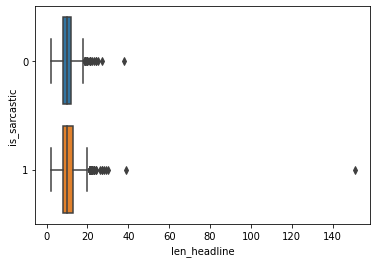

In [13]:
ax = sns.boxplot(y="is_sarcastic", x="len_headline", data=data, orient="h")

In [14]:
data_temp = data.groupby(['is_sarcastic'])['len_headline'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,9.818040,2.882000,2.0,8.0,10.0,12.0,38.0
1,1,8726.0,10.291772,3.950803,2.0,8.0,10.0,13.0,151.0


In [15]:
data['len_headline'].corr(data['is_sarcastic'])

0.0687617153511716

It seems like both classes have similar distribution and but ```sarcastic``` titles are slightly longer than normal.

## Step 1: Discard Symbol (Not useful)

In [16]:
data['headline_s1'] = data.headline.apply(lambda row: remove_symbol(row))
data['len_headline_s1'] = data.headline_s1.apply(lambda row: count_word(row))
data['count_symbol'] = data.len_headline - data.len_headline_s1
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,count_symbol
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0


In [17]:
data_temp = data.groupby(['is_sarcastic'])['count_symbol'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,0.020334,0.143346,0.0,0.0,0.0,0.0,3.0
1,1,8726.0,0.003553,0.059501,0.0,0.0,0.0,0.0,1.0


In [18]:
data.groupby(['is_sarcastic'])['count_symbol'].value_counts()

is_sarcastic  count_symbol
0             0               9397
              1                192
              3                  1
1             0               8695
              1                 31
Name: count_symbol, dtype: int64

In [19]:
(181/(8810+181), 30/(8150+30)) # sarcastic use fewer symbols

(0.020131242353464574, 0.003667481662591687)

In [20]:
data['contain_symbol'] = data.count_symbol.apply(lambda row: 1 if row > 0 else 0)
data['ratio_symbol'] = 1 - data.len_headline_s1/data.len_headline
data = data.drop(columns=['count_symbol', 'contain_symbol']) # seem like count symbol not helpful

In [21]:
data.groupby(['is_sarcastic'])['ratio_symbol'].describe()

,count,mean,std,min,25%,50%,75%,max
is_sarcastic,,,,,,,,
0,9590.0,0.002036,0.015528,0.0,0.0,0.0,0.0,0.375000
1,8726.0,0.000323,0.005646,0.0,0.0,0.0,0.0,0.166667


/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

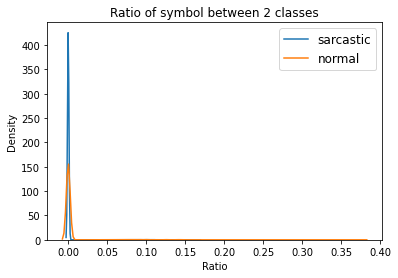

In [22]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['ratio_symbol'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['ratio_symbol'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Ratio of symbol between 2 classes')
plt.xlabel('Ratio')
plt.ylabel('Density')  

In [23]:
data['ratio_symbol'].corr(data['is_sarcastic'])

-0.07175478409753633

## Step 2: Lemmatized headline (Not useful)

In [24]:
data['headline_s2'] = data.headline_s1.apply(lambda row: lemmatize_word(row, 'v'))
data['headline_s2'] = data.headline_s2.apply(lambda row: lemmatize_word(row, 'n'))
data['len_headline_s2'] = data.headline_s2.apply(lambda row: count_word(row))

In [25]:
count_lemmatized = count_lemmatized_word(data, 'headline_s1', 'headline_s2')

In [26]:
data['count_lemmatized'] = count_lemmatized

In [27]:
data['ratio_lemmatized'] = data['count_lemmatized'] / data['len_headline_s1']

In [28]:
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000


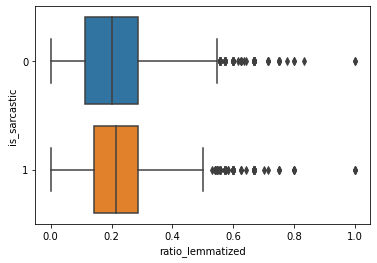

In [29]:
ax = sns.boxplot(y="is_sarcastic", x="ratio_lemmatized", data=data, orient="h")

In [30]:
data.groupby(['is_sarcastic'])['ratio_lemmatized'].describe()

,count,mean,std,min,25%,50%,75%,max
is_sarcastic,,,,,,,,
0,9590.0,0.203985,0.126717,0.0,0.111111,0.200000,0.285714,1.0
1,8726.0,0.224650,0.117543,0.0,0.142857,0.214286,0.285714,1.0


/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

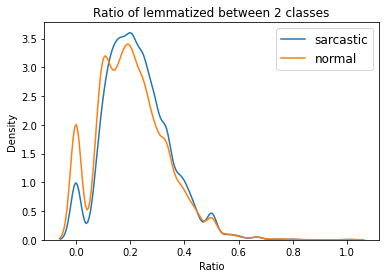

In [31]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['ratio_lemmatized'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['ratio_lemmatized'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Ratio of lemmatized between 2 classes')
plt.xlabel('Ratio')
plt.ylabel('Density')  

In [32]:
data['ratio_lemmatized'].corr(data['is_sarcastic'])

0.08400822832721529

## Step 3: Remove stop words

In [33]:
data['headline_s3'] = data.headline_s2.apply(lambda row: remove_stop_words(row))
data['len_headline_s3'] = data.headline_s3.apply(lambda row: count_word(row))

In [34]:
data['numb_stopwords'] = data['len_headline_s2'] - data['len_headline_s3']

In [35]:
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,headline_s3,len_headline_s3,numb_stopwords
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,3 key build immediate rapport job interview,7,4
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,chipotle make big change nobody really care,7,2
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,highway billboard urge 75mile detour,5,0
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,raytheon ceo send obama another article mount ...,9,2
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,mcdonnelldouglas unveil new gaydar,4,0


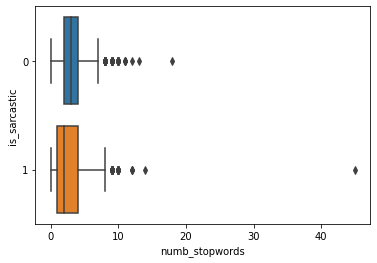

In [36]:
ax = sns.boxplot(y="is_sarcastic", x="numb_stopwords", data=data, orient="h")

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

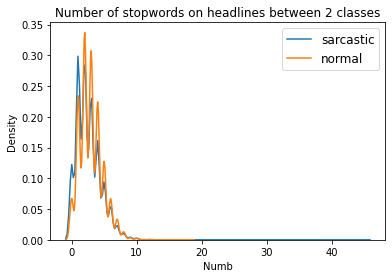

In [37]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['numb_stopwords'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['numb_stopwords'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Number of stopwords on headlines between 2 classes')
plt.xlabel('Numb')
plt.ylabel('Density')  

In [38]:
data_temp = data.groupby(['is_sarcastic'])['numb_stopwords'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,2.939208,1.762862,0.0,2.0,3.0,4.0,18.0
1,1,8726.0,2.583887,1.884094,0.0,1.0,2.0,4.0,45.0


It seems like both classes have similar distribution and but ```sarcastic``` titles have fewer stopwords than normal.

### Stopwords Ratio

In [39]:
data['ratio_stopwords'] = data['numb_stopwords'] / data['len_headline_s2']
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,headline_s3,len_headline_s3,numb_stopwords,ratio_stopwords
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,3 key build immediate rapport job interview,7,4,0.363636
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,chipotle make big change nobody really care,7,2,0.222222
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,highway billboard urge 75mile detour,5,0,0.000000
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,raytheon ceo send obama another article mount ...,9,2,0.181818
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,mcdonnelldouglas unveil new gaydar,4,0,0.000000


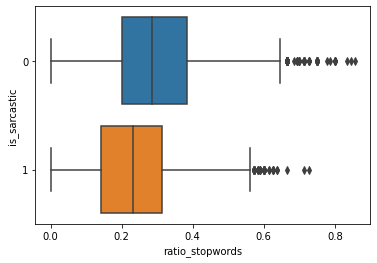

In [40]:
ax = sns.boxplot(y="is_sarcastic", x="ratio_stopwords", data=data, orient="h")

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

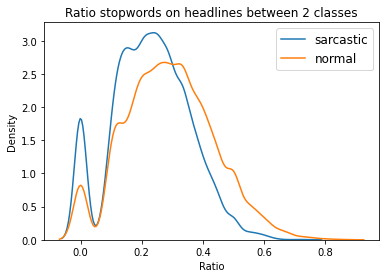

In [41]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['ratio_stopwords'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['ratio_stopwords'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Ratio stopwords on headlines between 2 classes')
plt.xlabel('Ratio')
plt.ylabel('Density')  

In [42]:
data_temp = data.groupby(['is_sarcastic'])['ratio_stopwords'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,0.291344,0.144048,0.0,0.200000,0.285714,0.384615,0.857143
1,1,8726.0,0.231100,0.124633,0.0,0.142857,0.230769,0.312500,0.727273


```sarcastic``` titles have ratio stopwords lower than normal.

In [43]:
data['ratio_stopwords'].corr(data['is_sarcastic'])

-0.21732688441539383

In [44]:
data['numb_stopwords'].corr(data['is_sarcastic'])

-0.09696604646809377

## Step 4: Capitalized Word (Not useful)

In [45]:
data['count_capital'] = data.headline.apply(lambda row: count_capitalized(row))
data['count_capital'].sum()

0

In [46]:
data = data.drop(columns=['count_capital'])

No capitalized word in the title

## Step 5: Len of each word in the Title

In [47]:
data['min_len_word'] = data.headline_s1.apply(lambda row: min_len_word(row))
data['max_len_word'] = data.headline_s1.apply(lambda row: max_len_word(row))
data['avg_len_word'] = data.headline_s1.apply(lambda row: avg_len_word(row))

In [48]:
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,headline_s3,len_headline_s3,numb_stopwords,ratio_stopwords,min_len_word,max_len_word,avg_len_word
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,3 key build immediate rapport job interview,7,4,0.363636,1,9,4.454545
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,chipotle make big change nobody really care,7,2,0.222222,2,8,5.111111
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,highway billboard urge 75mile detour,5,0,0.000000,5,9,6.600000
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,raytheon ceo send obama another article mount ...,9,2,0.181818,2,8,5.545455
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,mcdonnelldouglas unveil new gaydar,4,0,0.000000,3,16,8.000000


In [49]:
data_temp = data.groupby(['is_sarcastic'])['min_len_word'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,2.063191,0.868067,1.0,2.0,2.0,2.0,13.0
1,1,8726.0,2.284094,0.863838,1.0,2.0,2.0,2.0,9.0


In [50]:
data_temp = data.groupby(['is_sarcastic'])['max_len_word'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,9.268196,2.112248,3.0,8.0,9.0,10.0,27.0
1,1,8726.0,9.716594,2.225307,4.0,8.0,10.0,11.0,48.0


In [51]:
data_temp = data.groupby(['is_sarcastic'])['avg_len_word'].describe().reset_index()
data_temp

,is_sarcastic,count,mean,std,min,25%,50%,75%,max
0,0,9590.0,5.133251,0.920002,2.500000,4.5,5.000000,5.666667,13.333333
1,1,8726.0,5.464712,0.960154,2.714286,4.8,5.363636,6.000000,12.285714


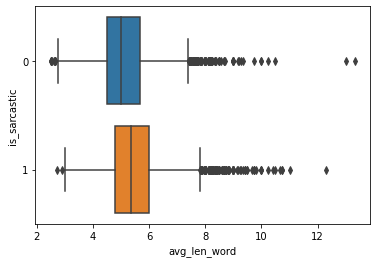

In [52]:
ax = sns.boxplot(y="is_sarcastic", x="avg_len_word", data=data, orient="h")

In [53]:
data['avg_len_word'].corr(data['is_sarcastic'])

0.17357013287935222

In [54]:
data['min_len_word'].corr(data['is_sarcastic'])

0.12637739969834877

In [55]:
data['max_len_word'].corr(data['is_sarcastic'])

0.1028106396291622

## Step 6: Contain Number (Not useful)

In [56]:
data['has_number'] = data.headline.apply(lambda row: 1 if has_Number(row) else 0)
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,headline_s3,len_headline_s3,numb_stopwords,ratio_stopwords,min_len_word,max_len_word,avg_len_word,has_number
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,3 key build immediate rapport job interview,7,4,0.363636,1,9,4.454545,1
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,chipotle make big change nobody really care,7,2,0.222222,2,8,5.111111,0
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,highway billboard urge 75mile detour,5,0,0.000000,5,9,6.600000,1
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,raytheon ceo send obama another article mount ...,9,2,0.181818,2,8,5.545455,0
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,mcdonnelldouglas unveil new gaydar,4,0,0.000000,3,16,8.000000,0


In [57]:
data.groupby(['is_sarcastic'])['has_number'].value_counts()

is_sarcastic  has_number
0             0             8172
              1             1418
1             0             7444
              1             1282
Name: has_number, dtype: int64

In [58]:
(1418/(1418+8172), 1282/(1282+7444))

(0.1478623566214807, 0.1469172587669035)

## Step 7: Readability

### Syllable

In [59]:
data['min_syl_word'] = data.headline_s1.apply(lambda row: min_syl_word(row))
data['max_syl_word'] = data.headline_s1.apply(lambda row: max_syl_word(row))
data['avg_syl_word'] = data.headline_s1.apply(lambda row: avg_syl_word(row))
data['numb_syl'] = data.headline_s1.apply(lambda row: count_syllable(row))
data['norm_numb_syl'] = data.numb_syl / data.len_headline_s1

In [60]:
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,...,ratio_stopwords,min_len_word,max_len_word,avg_len_word,has_number,min_syl_word,max_syl_word,avg_syl_word,numb_syl,norm_numb_syl
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,...,0.363636,1,9,4.454545,1,1,4,1.636364,18,1.636364
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,...,0.222222,2,8,5.111111,0,1,3,1.555556,14,1.555556
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,...,0.000000,5,9,6.600000,1,1,2,1.600000,8,1.600000
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,...,0.181818,2,8,5.545455,0,1,3,1.636364,18,1.636364
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,...,0.000000,3,16,8.000000,0,1,5,2.500000,10,2.500000


In [61]:
data['min_syl_word'].corr(data['is_sarcastic'])

0.030072954200869174

In [62]:
data['max_syl_word'].corr(data['is_sarcastic'])

0.09150957448661082

In [63]:
data['avg_syl_word'].corr(data['is_sarcastic'])

0.15568435599672417

In [64]:
data['numb_syl'].corr(data['is_sarcastic'])

0.14993987440630346

In [65]:
data['norm_numb_syl'].corr(data['is_sarcastic'])

0.15211688834361267

```sarcastic``` tend to use words with longer syllabel

### Lexicon (Not Useful)

In [68]:
data['numb_lex'] = data.headline_s1.apply(lambda row: count_lexicon(row))
data['norm_numb_lex'] = data.numb_lex / data.len_headline_s1
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,...,max_len_word,avg_len_word,has_number,min_syl_word,max_syl_word,avg_syl_word,numb_syl,norm_numb_syl,numb_lex,norm_numb_lex
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,...,9,4.454545,1,1,4,1.636364,18,1.636364,11,1.0
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,...,8,5.111111,0,1,3,1.555556,14,1.555556,9,1.0
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,...,9,6.600000,1,1,2,1.600000,8,1.600000,5,1.0
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,...,8,5.545455,0,1,3,1.636364,18,1.636364,11,1.0
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,...,16,8.000000,0,1,5,2.500000,10,2.500000,4,1.0


In [69]:
data['norm_numb_lex'].corr(data['is_sarcastic'])

0.013032827417104917

In [70]:
data['numb_lex'].corr(data['is_sarcastic'])

0.07132936862421263

### Readability tests

In [84]:
data['flesch_reading_score'] = data.headline.apply(lambda row: textstat.flesch_reading_ease(row))
data['flesch_grade_score'] = data.headline.apply(lambda row: textstat.flesch_kincaid_grade(row))
data['fog_score'] = data.headline.apply(lambda row: textstat.gunning_fog(row))
data['smog_score'] = data.headline.apply(lambda row: textstat.smog_index(row))
data['ari_score'] = data.headline.apply(lambda row: textstat.automated_readability_index(row))
data['coleman_score'] = data.headline.apply(lambda row: textstat.coleman_liau_index(row))
data['linsear_score'] = data.headline.apply(lambda row: textstat.linsear_write_formula(row))
data['dale_score'] = data.headline.apply(lambda row: textstat.dale_chall_readability_score(row))
data['standard_score'] = data.headline.apply(lambda row: textstat.text_standard(row, float_output=True))

In [85]:
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,...,norm_numb_lex,flesch_reading_score,flesch_grade_score,fog_score,smog_score,ari_score,coleman_score,linsear_score,dale_score,standard_score
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,...,1.0,60.31,7.6,11.67,0.0,5.0,7.35,6.5,8.49,8.0
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,...,1.0,62.34,6.8,3.60,0.0,7.1,10.58,4.5,5.84,7.0
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,...,1.0,66.40,5.2,2.00,0.0,13.1,16.56,1.5,7.04,2.0
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,...,1.0,60.31,7.6,8.04,0.0,10.2,13.73,6.5,9.92,8.0
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,...,1.0,-8.73,15.5,11.60,0.0,23.0,23.20,2.0,15.68,16.0


In [86]:
data['flesch_reading_score'].corr(data['is_sarcastic'])

-0.16319503505310232

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

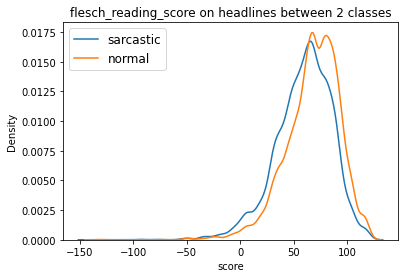

In [96]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['flesch_reading_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['flesch_reading_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('flesch_reading_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

In [87]:
data['flesch_grade_score'].corr(data['is_sarcastic'])

0.17857554788933952

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

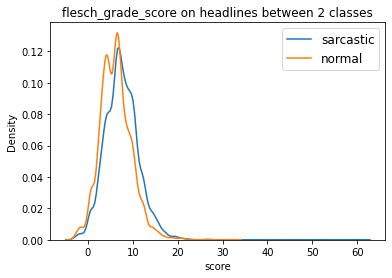

In [97]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['flesch_grade_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['flesch_grade_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('flesch_grade_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

In [88]:
data['fog_score'].corr(data['is_sarcastic'])

0.09957961811147485

In [89]:
data['smog_score'].corr(data['is_sarcastic'])

nan

In [90]:
data['ari_score'].corr(data['is_sarcastic'])

0.18537336729825488

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

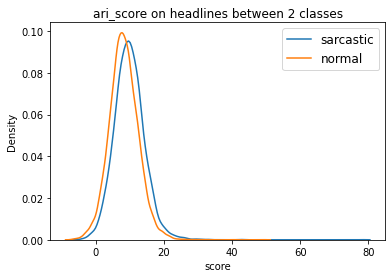

In [98]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['ari_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['ari_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('ari_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

In [91]:
data['coleman_score'].corr(data['is_sarcastic'])

0.18822091599262286

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

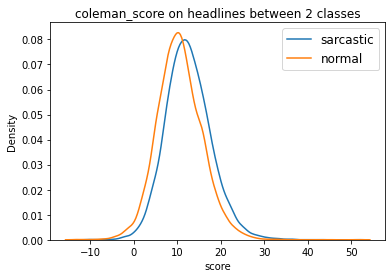

In [99]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['coleman_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['coleman_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('coleman_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

In [92]:
data['linsear_score'].corr(data['is_sarcastic'])

0.12596705466683933

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

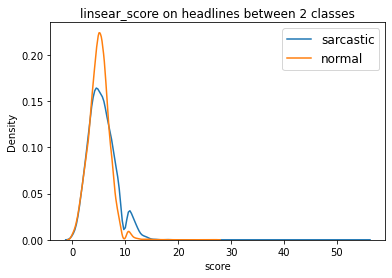

In [102]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['linsear_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['linsear_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('linsear_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

In [93]:
data['dale_score'].corr(data['is_sarcastic'])

0.10891749011923774

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

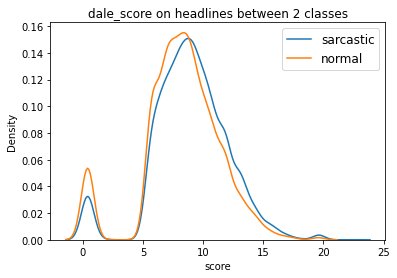

In [101]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['dale_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['dale_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('dale_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

In [94]:
data['standard_score'].corr(data['is_sarcastic'])

0.14165519786266792

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

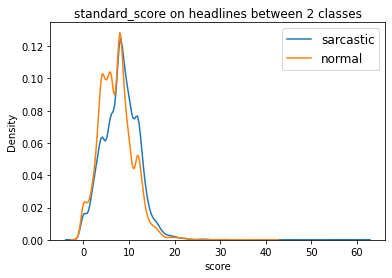

In [100]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['standard_score'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['standard_score'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('standard_score on headlines between 2 classes')
plt.xlabel('score')
plt.ylabel('Density')  

## Step 8: POS Tagging

In [126]:
data['numb_NN'] = data.headline.apply(lambda row: count_noun(row))
data['numb_VED'] = data.headline.apply(lambda row: count_verb_past(row))
data['numb_VB'] = data.headline.apply(lambda row: count_verb_present(row))
data['numb_VING'] = data.headline.apply(lambda row: count_verb_ing(row))
data['numb_ADJ'] = data.headline.apply(lambda row: count_adj(row))
data['numb_ADV'] = data.headline.apply(lambda row: count_adv(row))
data['numb_DT'] = data.headline.apply(lambda row: count_DT(row))
data['numb_CD'] = data.headline.apply(lambda row: count_CD(row))
data['numb_PR'] = data.headline.apply(lambda row: count_pronoun(row))

In [127]:
data['norm_numb_NN'] = data['numb_NN'] / data['len_headline']
data['norm_numb_VED'] = data['numb_VED'] / data['len_headline']
data['norm_numb_VB'] = data['numb_VB'] / data['len_headline']
data['norm_numb_VING'] = data['numb_VING'] / data['len_headline']
data['norm_numb_ADJ'] = data['numb_ADJ'] / data['len_headline']
data['norm_numb_ADV'] = data['numb_ADV'] / data['len_headline']
data['norm_numb_DT'] = data['numb_DT'] / data['len_headline']
data['norm_numb_CD'] = data['numb_CD'] / data['len_headline']
data['norm_numb_PR'] = data['numb_PR'] / data['len_headline']

In [128]:
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,...,numb_PR,norm_numb_NN,norm_numb_VED,norm_numb_VB,norm_numb_VING,norm_numb_ADJ,norm_numb_ADV,norm_numb_DT,norm_numb_CD,norm_numb_PR
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,...,0,0.363636,0.0,0.000000,0.090909,0.181818,0.000000,0.181818,0.090909,0.0
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,...,0,0.444444,0.0,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.0
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,...,0,0.400000,0.0,0.000000,0.000000,0.400000,0.200000,0.000000,0.000000,0.0
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,...,0,0.454545,0.0,0.090909,0.090909,0.181818,0.000000,0.090909,0.000000,0.0
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,...,0,0.500000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0


In [131]:
data['norm_numb_NN'].corr(data['is_sarcastic'])

0.017630790178161257

In [132]:
data['norm_numb_VED'].corr(data['is_sarcastic'])

0.1118618107343182

In [133]:
data['norm_numb_VB'].corr(data['is_sarcastic'])

-0.051146486734245225

In [134]:
data['norm_numb_VING'].corr(data['is_sarcastic'])

0.10653993174100762

In [135]:
data['norm_numb_ADJ'].corr(data['is_sarcastic'])

0.13162814289131652

In [137]:
data['norm_numb_ADV'].corr(data['is_sarcastic'])

0.12634291254154473

In [144]:
data['norm_numb_DT'].corr(data['is_sarcastic'])

-0.3215668899742273

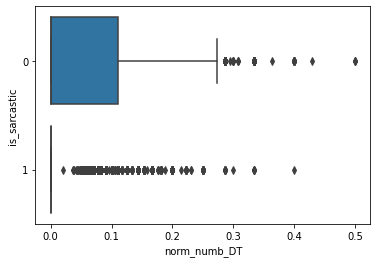

In [146]:
ax = sns.boxplot(y="is_sarcastic", x="norm_numb_DT", data=data, orient="h")

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

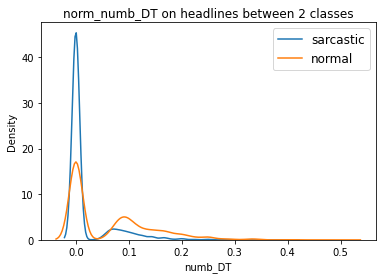

In [147]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['norm_numb_DT'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['norm_numb_DT'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('norm_numb_DT on headlines between 2 classes')
plt.xlabel('numb_DT')
plt.ylabel('Density')  

In [139]:
data['norm_numb_CD'].corr(data['is_sarcastic'])

-0.051410518308543984

In [140]:
data['norm_numb_PR'].corr(data['is_sarcastic'])

-0.11531375643971398

In [142]:
(data['norm_numb_VING']+data['norm_numb_VB']+data['norm_numb_VED']).corr(data['is_sarcastic'])

0.08251365064397406

## Step 9: Syntax Tree

In [276]:
from nltk import pos_tag, word_tokenize, RegexpParser
chunker = RegexpParser(""" 
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases 
                       P: {<IN>}               #To extract Prepositions 
                       V: {<V.*>}              #To extract Verbs 
                       PP: {<P> <NP>}          #To extract Prepostional Phrases 
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases 
                       """) 

def get_depth_syntax_tree(sent):
    tagged = pos_tag(word_tokenize(sent))
    tree = chunker.parse(tagged) 
    tree_sent = f"{tree}"
    t = nltk.Tree.fromstring(tree_sent)
    depth = t.height()
    return depth

In [277]:
data['depth_syntree'] = data.headline_s1.apply(lambda row: get_depth_syntax_tree(row))
data['norm_depth_syntree'] = data['depth_syntree'] / data.len_headline_s1
data.head()

,is_sarcastic,headline,len_headline,headline_s1,len_headline_s1,ratio_symbol,headline_s2,len_headline_s2,count_lemmatized,ratio_lemmatized,...,norm_numb_NN,norm_numb_VED,norm_numb_VB,norm_numb_VING,norm_numb_ADJ,norm_numb_ADV,norm_numb_DT,norm_numb_CD,norm_numb_PR,depth_syntree
0,0,the 3 keys to building immediate rapport in a ...,11,the 3 keys to building immediate rapport in a ...,11,0.0,the 3 key to build immediate rapport in a job ...,11,2,0.181818,...,0.363636,0.0,0.000000,0.090909,0.181818,0.000000,0.181818,0.090909,0.0,5
1,0,chipotle is making big changes but nobody real...,9,chipotle is making big changes but nobody real...,9,0.0,chipotle be make big change but nobody really ...,9,4,0.444444,...,0.444444,0.0,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.0,4
2,1,highway billboard urges 75-mile detour,5,highway billboard urges 75mile detour,5,0.0,highway billboard urge 75mile detour,5,1,0.200000,...,0.400000,0.0,0.000000,0.000000,0.400000,0.200000,0.000000,0.000000,0.0,3
3,1,raytheon ceo sends obama another article about...,11,raytheon ceo sends obama another article about...,11,0.0,raytheon ceo send obama another article about ...,11,2,0.181818,...,0.454545,0.0,0.090909,0.090909,0.181818,0.000000,0.090909,0.000000,0.0,5
4,1,mcdonnell-douglas unveils new 'gay-dar',4,mcdonnelldouglas unveils new gaydar,4,0.0,mcdonnelldouglas unveil new gaydar,4,1,0.250000,...,0.500000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,3


In [284]:
data['depth_syntree'].corr(data['is_sarcastic'])

0.07639069337551128

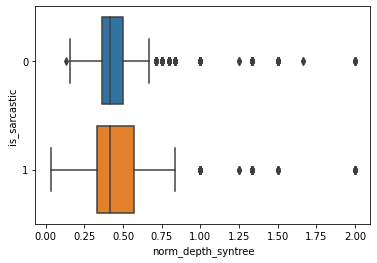

In [281]:
ax = sns.boxplot(y="is_sarcastic", x="norm_depth_syntree", data=data, orient="h")

/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

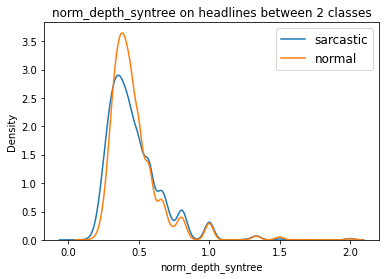

In [282]:
df = data[data.is_sarcastic == 1]
sns.distplot(df['norm_depth_syntree'], hist = False, kde = True, label='sarcastic')
df = data[data.is_sarcastic == 0]
sns.distplot(df['norm_depth_syntree'], hist = False, kde = True, label='normal')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('norm_depth_syntree on headlines between 2 classes')
plt.xlabel('norm_depth_syntree')
plt.ylabel('Density')  

## Get pd feature only

In [290]:
print('Extract Features Training ...')
data_train_ft = extract_feature_basic(df_train)
print('Extract Features Validating ...')
data_validate_ft = extract_feature_basic(df_validate)

Extract Features Training ...
Extract Features Validating ...


In [292]:
data_train_ft

,is_sarcastic,len_headline,len_headline_s1,count_symbol,contain_symbol,ratio_symbol,len_headline_s2,count_lemmatized,ratio_lemmatized,len_headline_s3,...,norm_numb_VED,norm_numb_VB,norm_numb_VING,norm_numb_ADJ,norm_numb_ADV,norm_numb_DT,norm_numb_CD,norm_numb_PR,depth_syntree,norm_depth_syntree
0,0,11,11,0,0,0.0,11,2,0.181818,7,...,0.000000,0.000000,0.090909,0.181818,0.000000,0.181818,0.090909,0.000000,5,0.454545
1,0,9,9,0,0,0.0,9,4,0.444444,7,...,0.000000,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,4,0.444444
2,1,5,5,0,0,0.0,5,1,0.200000,5,...,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,3,0.600000
3,1,11,11,0,0,0.0,11,2,0.181818,9,...,0.000000,0.090909,0.090909,0.181818,0.000000,0.090909,0.000000,0.000000,5,0.454545
4,1,4,4,0,0,0.0,4,1,0.250000,4,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,3,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,0,8,8,0,0,0.0,8,2,0.250000,6,...,0.000000,0.000000,0.000000,0.375000,0.000000,0.125000,0.125000,0.000000,3,0.375000
18312,0,3,3,0,0,0.0,3,0,0.000000,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,3,1.000000
18313,1,7,7,0,0,0.0,7,2,0.285714,7,...,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,4,0.571429
18314,1,8,8,0,0,0.0,8,1,0.125000,6,...,0.125000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,5,0.625000


In [ ]:
X_train = data_train_ft.drop(columns=['is_sarcastic'])
y_train = data_train_ft['is_sarcastic']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [305]:
X_validate = data_validate_ft.drop(columns=['is_sarcastic'])
y_validate = data_validate_ft['is_sarcastic']
X_validate = np.asarray(X_validate)
y_validate = np.asarray(y_validate)

In [367]:
feature_names = list(data_validate_ft.drop(columns=['is_sarcastic']).columns)

## RF

### GridSearch

In [331]:
from sklearn.model_selection import GridSearchCV

hypara = {
    'max_depth': [30, 40, 50],
    'n_estimators': [200, 250, 300],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [2, 5],
}

model_cv_rf = GridSearchCV(RandomForestClassifier(), hypara, verbose=1, n_jobs=-1)
model_cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.8min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [30, 40, 50], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [200, 250, 300]},
             verbose=1)

In [332]:
model_cv_rf.best_score_

0.7186612525586324

In [334]:
model_cv_rf.best_params_

{'max_depth': 40,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 250}

In [333]:
validate_pred = model_cv_rf.predict_proba(X_validate)
validate_pred = validate_pred[:,1]
metrics = calculate_metric(y_validate, validate_pred)
metrics

{'accuracy': 0.7097619567591177,
 'precision': 0.6943430656934306,
 'recall': 0.69784502521779,
 'f1': 0.696089640978733,
 'tp': 1522,
 'tn': 1728,
 'fp': 670,
 'fn': 659,
 'auc': 0.7869657926003596}

### Train RF

In [363]:
from sklearn.ensemble import RandomForestClassifier

hypara = {
    'random_state': 1509,
    'max_depth': 30,
    'n_estimators': 250,
    'min_samples_split': 7,
    'min_samples_leaf': 5,
    
}
model_rf = RandomForestClassifier(**hypara)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=7,
                       n_estimators=250, random_state=1509)

In [364]:
train_pred = model_rf.predict_proba(X_train)
train_pred = train_pred[:,1]
metrics = calculate_metric(y_train, train_pred)
metrics

{'accuracy': 0.8994867875081896,
 'precision': 0.9017388260007002,
 'recall': 0.8855145542058217,
 'f1': 0.893553050014455,
 'tp': 7727,
 'tn': 8748,
 'fp': 842,
 'fn': 999,
 'auc': 0.9660450281385535}

In [365]:
validate_pred = model_rf.predict_proba(X_validate)
validate_pred = validate_pred[:,1]
metrics = calculate_metric(y_validate, validate_pred)
metrics

{'accuracy': 0.7082332386984058,
 'precision': 0.6930105070808589,
 'recall': 0.6955524988537368,
 'f1': 0.694279176201373,
 'tp': 1517,
 'tn': 1726,
 'fp': 672,
 'fn': 664,
 'auc': 0.7865405566842918}

### Feature Importance

In [380]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_rf, X_train, y_train, n_repeats=10,
                                random_state=1509, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

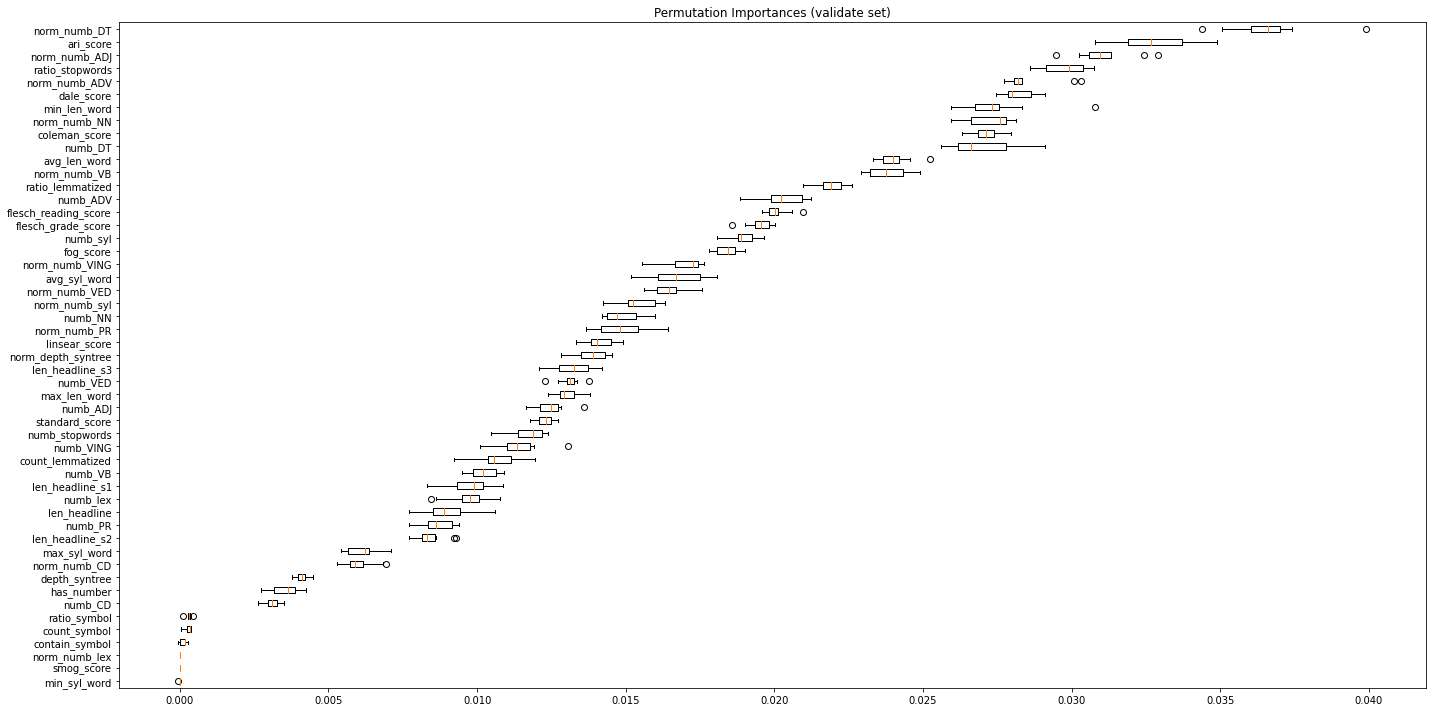

In [381]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.asarray(feature_names)[sorted_idx])
ax.set_title("Permutation Importances (validate set)")
fig.tight_layout()
plt.show()

## SVM

In [384]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline(steps=[('preprocess', StandardScaler()), ('svm', SVC(gamma='auto'))])

param_grid = {
    'svm__C' : [0.1, 0.5, 1, 2, 5, 10],
}

search = GridSearchCV(pipe, param_grid, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)


/home/nmduy/anaconda3/envs/graph/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess', StandardScaler()),
                                       ('svm', SVC(gamma='auto'))]),
             iid=False, param_grid={'svm__C': [0.1, 0.5, 1, 2, 5, 10]})